In [3]:
import os, sys, matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns
from glob import glob

In [9]:
mod = "5mC"
wdir = "/home/lpryszcz/cluster/dna_mods/ecoli/qsub/"
pat = os.path.join(wdir, "*/PRJEB22772/*/*%s*.flt.bed"%mod)
fnames = list(sorted(glob(pat))); fnames[1::2]

['/home/lpryszcz/cluster/dna_mods/ecoli/qsub/megalodon/PRJEB22772/MARC_ZFscreens_R9.4_2D-Ecoli-run_FAF05711/modified_bases.5mC.bed.5mC.flt.bed',
 '/home/lpryszcz/cluster/dna_mods/ecoli/qsub/modPhred/PRJEB22772/minimap2/MARC_ZFscreens_R9.4_2D-Ecoli-run_FAF05711.bam.bed.5mC.flt.bed']

In [10]:
!head /home/lpryszcz/cluster/dna_mods/ecoli/qsub/modPhred/PRJEB22772/minimap2/MARC_ZFscreens_R9.4_2D-Ecoli-run_FAF05711.bam.bed.5mC.flt.bed

NC_000913.3	419	420	5mC	967	+	419	420	0,0,178	132	70
NC_000913.3	421	422	5mC	900	-	421	422	0,0,109	103	43
NC_000913.3	422	423	5mC	667	-	422	423	0,0,15	121	6
NC_000913.3	474	475	5mC	967	+	474	475	0,0,175	131	69
NC_000913.3	476	477	5mC	867	-	476	477	0,0,107	119	42
NC_000913.3	507	508	5mC	933	+	507	508	0,0,161	128	63
NC_000913.3	509	510	5mC	967	-	509	510	0,0,158	116	62
NC_000913.3	1089	1090	5mC	933	+	1089	1090	0,0,128	134	50
NC_000913.3	1091	1092	5mC	800	-	1091	1092	0,0,108	106	42
NC_000913.3	1207	1208	5mC	867	+	1207	1208	0,0,97	137	38


6mA	0.883	0.843
5mC	0.895	0.843


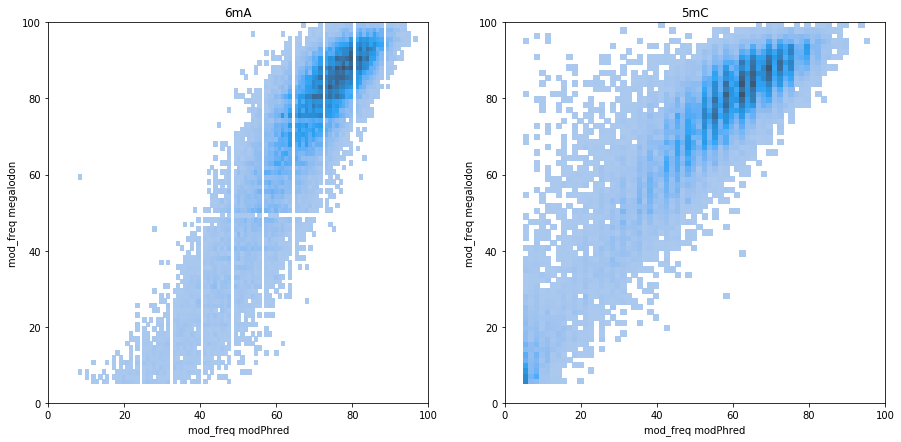

In [81]:
wdir = "/home/lpryszcz/cluster/dna_mods/ecoli/qsub/"

mods = ("6mA", "5mC")
fig, axes = plt.subplots(1, len(mods), figsize=(15, 7))

cols = ["chrom", "start", "end", "name", "score", "strand", 
        "ss", "ee", "color", "depth", "mod_freq"]
coi = [*cols[:3], cols[5], cols[-1]]

for mod, ax in zip(mods, axes):
    pat = os.path.join(wdir, "*/PRJEB22772/*/*%s*.flt.bed"%mod)
    fnames = list(sorted(glob(pat))); fnames[1::2]
    dfs = []
    for fn in fnames[1::2]:
        #print(fn)
        df = pd.read_csv(fn, sep="\t", names=cols)
        dfs.append(df)
    df1, df2 = dfs[-1], dfs[0]
    df = pd.merge(df1[coi], df2[coi], how="inner", on=coi[:-1], # skip freq on join
                  suffixes=[' modPhred', ' megalodon'])
    rhos = []
    for method in ('pearson', 'spearman'):
        rhos.append(df[df.columns[-2:]].corr(method=method).to_numpy()[0, 1])
    print("%s\t%.3f\t%.3f"%(mod, *rhos))
    x, y = df.columns[-2:]
    g = sns.histplot(x=x, y=y, data=df, ax=ax)
    ax.set_xlim(0, 100); ax.set_ylim(0, 100)
    ax.set_title(mod)
fig.savefig(os.path.join(wdir, "modPhred_vs_megalodon.pdf"))

In [83]:
df[df.columns[-2:]].head() #.corr(method=method)

,mod_freq modPhred,mod_freq megalodon
0,70,88.6
1,43,71.0
2,69,97.3
3,42,64.5
4,63,92.7


In [86]:
from scipy import stats
stats.pearsonr(df[df.columns[-2]], df[df.columns[-1]]), stats.spearmanr(df[df.columns[-2]], df[df.columns[-1]])

((0.894624018985103, 0.0),
 SpearmanrResult(correlation=0.8429180629768572, pvalue=0.0))

In [65]:
df.columns[-2:]

Index(['freq modPhred', 'freq megalodon'], dtype='object')

In [75]:
print(df[df.columns[-2:]].corr(method='pearson').to_numpy()[0, 1])

0.8946240189851057


In [ ]:
# 
